# Classification Tree - Flight Delays Prediction

This program is a solution to the problem 9.2 of chapter 9 of following book. 

Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python, First Edition.

Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel

© 2020 John Wiley & Sons, Inc. Published 2020 by John Wiley & Sons, Inc.

## Chapter 9, Problem 9.2

Predicting Delayed Flights:

The file FlightDelays.csv contains information on all commercial flights departing the Washington, DC area and arriving at New York during January 2004. For each flight, there is information on the departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. The variable that we are trying to predict is whether or not a flight is delayed. A delay is defined as an arrival that is at least 15 minutes later than scheduled.

Data Preprocessing:

Transform variable day of week (DAY_WEEK) into a categorical variable. Bin the scheduled departure time into eight bins. Use these and all other columns as predictors (excluding DAY_OF_MONTH). Partition the data into training (60%) and validation (40%) sets.

    a. Fit a classification tree to the flight delay variable using all the relevant predictors. Do not include DEP_TIME (actual departure time) in the model because it is unknown at the time of prediction (unless we are generating our predictions of delays after the plane takes off, which is unlikely). Use a tree with maximum depth 8 and minimum impurity decrease = 0.01. Express the resulting tree as a set of rules.
    b. If you needed to fly between DCA and EWR on a Monday at 7:00 AM, would you be able to use this tree? What other information would you need? Is it available in practice? What information is redundant? 
    c. Fit the same tree as in (a), this time excluding the Weather predictor. Display both the resulting (small) tree and the full-grown tree. You will find that the small tree contains a single terminal node.
        i. How is the small tree used for classification? (What is the rule for classifying?)
        ii. To what is this rule equivalent?
        iii. Examine the full-grown tree. What are the top three predictors according to this tree?
        iv. Why, technically, does the small tree result in a single node?
        v. What is the disadvantage of using the top levels of the full-grown tree as opposed to the small tree?
        vi. Compare this general result to that from logistic regression in the example in Chapter 10. What are possible reasons for the classification tree’s failure to find a good predictive model?


## Importing Libraries

In [16]:
import pandas as pd

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import dmba
from dmba import plotDecisionTree

Printing versions of libraries

In [17]:
print('pandas version: {}'.format(pd.__version__))
print('sklearn version: {}'.format(skl.__version__))
print('dmba version: {}'.format(dmba.__version__))

pandas version: 1.5.3
sklearn version: 1.2.1
dmba version: 0.2.4


## Settings Options

In [18]:
# set the option to display all columns
pd.set_option('display.max_columns', None)

## Loading Dataset

In [19]:
df = pd.read_csv('FlightDelays.csv')
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


## Data Preprocessing

##### Transform variable day of week (DAY_WEEK) info a categorical variable. Bin the scheduled departure time into eight bins. Use these and all other columns as predictors (excluding DAY_OF_MONTH). Partition the data into training (60%) and validation (40%) sets.

Transforming column names to upper case for the sake of naming consistency. 

In [20]:
df = df.rename(columns=str.upper)
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,WEATHER,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT STATUS
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


Renaming column.

In [21]:
df = df.rename(columns={"FLIGHT STATUS": "FLIGHT_STATUS"})

Transforming variable day of week (DAY_WEEK) into a categorical variable.

In [22]:
df = pd.get_dummies(df, columns=['DAY_WEEK'])
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,WEATHER,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,1,N940CA,ontime,0,0,0,1,0,0,0
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,1,N405FJ,ontime,0,0,0,1,0,0,0
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,1,N695BR,ontime,0,0,0,1,0,0,0
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,1,N662BR,ontime,0,0,0,1,0,0,0
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,1,N698BR,ontime,0,0,0,1,0,0,0


Binning the scheduled departure time into eight bins.

In [23]:
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
df['CRS_DEP_TIME'] = pd.cut(df['CRS_DEP_TIME'], bins=bins, labels=labels)
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,WEATHER,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7
0,12-15,OH,1455,JFK,184,1/1/2004,5935,BWI,0,1,N940CA,ontime,0,0,0,1,0,0,0
1,15-18,DH,1640,JFK,213,1/1/2004,6155,DCA,0,1,N405FJ,ontime,0,0,0,1,0,0,0
2,12-15,DH,1245,LGA,229,1/1/2004,7208,IAD,0,1,N695BR,ontime,0,0,0,1,0,0,0
3,15-18,DH,1709,LGA,229,1/1/2004,7215,IAD,0,1,N662BR,ontime,0,0,0,1,0,0,0
4,9-12,DH,1035,LGA,229,1/1/2004,7792,IAD,0,1,N698BR,ontime,0,0,0,1,0,0,0


Partitioning the data into training (60%) and validation (40%) sets.

In [24]:
X = df.drop(columns=['DAY_OF_MONTH', 'FLIGHT_STATUS'])
X = pd.get_dummies(X, columns=['CRS_DEP_TIME', 'CARRIER', 'DEST', 'FL_DATE', 'ORIGIN', 'TAIL_NUM']) 
y = df['FLIGHT_STATUS']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Making Predictions

##### a. Fit a classification tree to the flight delay variable using all the relevant predictors. Do not include DEP_TIME (actual departure time) in the model because it is unknown at the time of prediction (unless we are generating our predictions of delays after the plane takes off, which is unlikely). Use a tree with maximum depth 8 and minimum impurity decrease = 0.01. Express the resulting tree as a set of rules.

As asked excluding DEP_TIME from the model. 

In [25]:
train_X = train_X.drop(columns=['DEP_TIME'])
valid_X = valid_X.drop(columns=['DEP_TIME'])

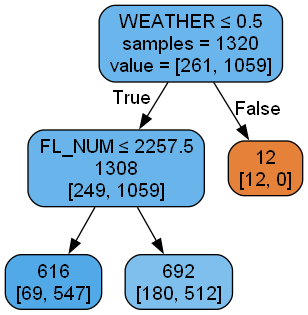

In [26]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=8, min_impurity_decrease=0.01)
classTree.fit(train_X, train_y)

plotDecisionTree(classTree, feature_names=train_X.columns)

##### b. If you needed to fly between DCA and EWR on a Monday at 7:00 AM, would you be able to use this tree? What other information would you need? Is it available in practice? What information is redundant?

We won't be able to use this tree if we needed to fly between DCA and WER on a Monday at 7:00 AM, because we need additional information such as ORIGIN, DEST, DAY_WEEK and CRS_DEP_TIME,  which is not available in this tree. These information is available in practice. The tree is very short as it includes only two variables, WEATHER and FL_NUM, therefore I do not see any redundant information.

##### c. Fit the same tree as in (a), this time excluding the Weather predictor. Display both the resulting (small) tree and the full-grown tree. You will find that the small tree contains a single terminal node.

Excluding Weather predictor.

In [27]:
train_X = train_X.drop(columns=['WEATHER'])
valid_X = valid_X.drop(columns=['WEATHER'])

Displaying the full-grown tree.

In [28]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

Displaying small tree.

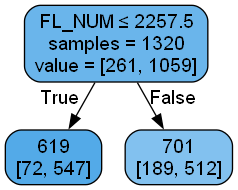

In [29]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=8, min_impurity_decrease=0.01)
classTree.fit(train_X, train_y)

plotDecisionTree(classTree, feature_names=train_X.columns)

###### i. How is the small tree used for classification? (What is the rule for classifying?)

In the small tree, FL_NUM variable is used for classification. If value of FL_NUM variable of a flight observation is less than or equal to 2257.5 then the flight is considered as ontime, otherwise the flight is considered delayed.

###### ii. To what is this rule equivalent?

We can say that this rule is equivalent to the rule that says flight will be delayed if FL_NUM is greater than 2257.5.

###### iii. Examine the full-grown tree. What are the top three predictors according to this tree?

In [30]:
importances = fullClassTree.feature_importances_
dfImpFullClTr = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
dfImpFullClTr = dfImpFullClTr.sort_values('importance', ascending=False)
print(dfImpFullClTr.head(3))

               feature  importance
1               FL_NUM    0.149674
14  CRS_DEP_TIME_15-18    0.031756
54    FL_DATE_1/5/2004    0.024117


According to above output, the top three predictors according to this tree are FL_NUM, CRS_DEP_TIME_15-18 and FL_DATE_1/5/2004.

###### iv. Why, technically, does the small tree result in a single node?

Small tree result in a single node because of a min_impurity_decrease parameter. Only value of one parameter FL_NUM induces a decrease of the impurity greater than or equal to 0.01. That is why small tree result in a single node.

###### v. What is the disadvantage of using the top levels of the full-grown tree as opposed to the small tree?

Using the top-levels of the full-grown tree will not induce a decrease of impurity greater than or equal to 0.01 as opposed to the small tree. 

###### vi. Compare this general result to that from logistic regression in the example in Chapter 10. What are possible reasons for the classification tree’s failure to find a good predictive model?

I will come back to answer this later when I have studied chapter 10. 